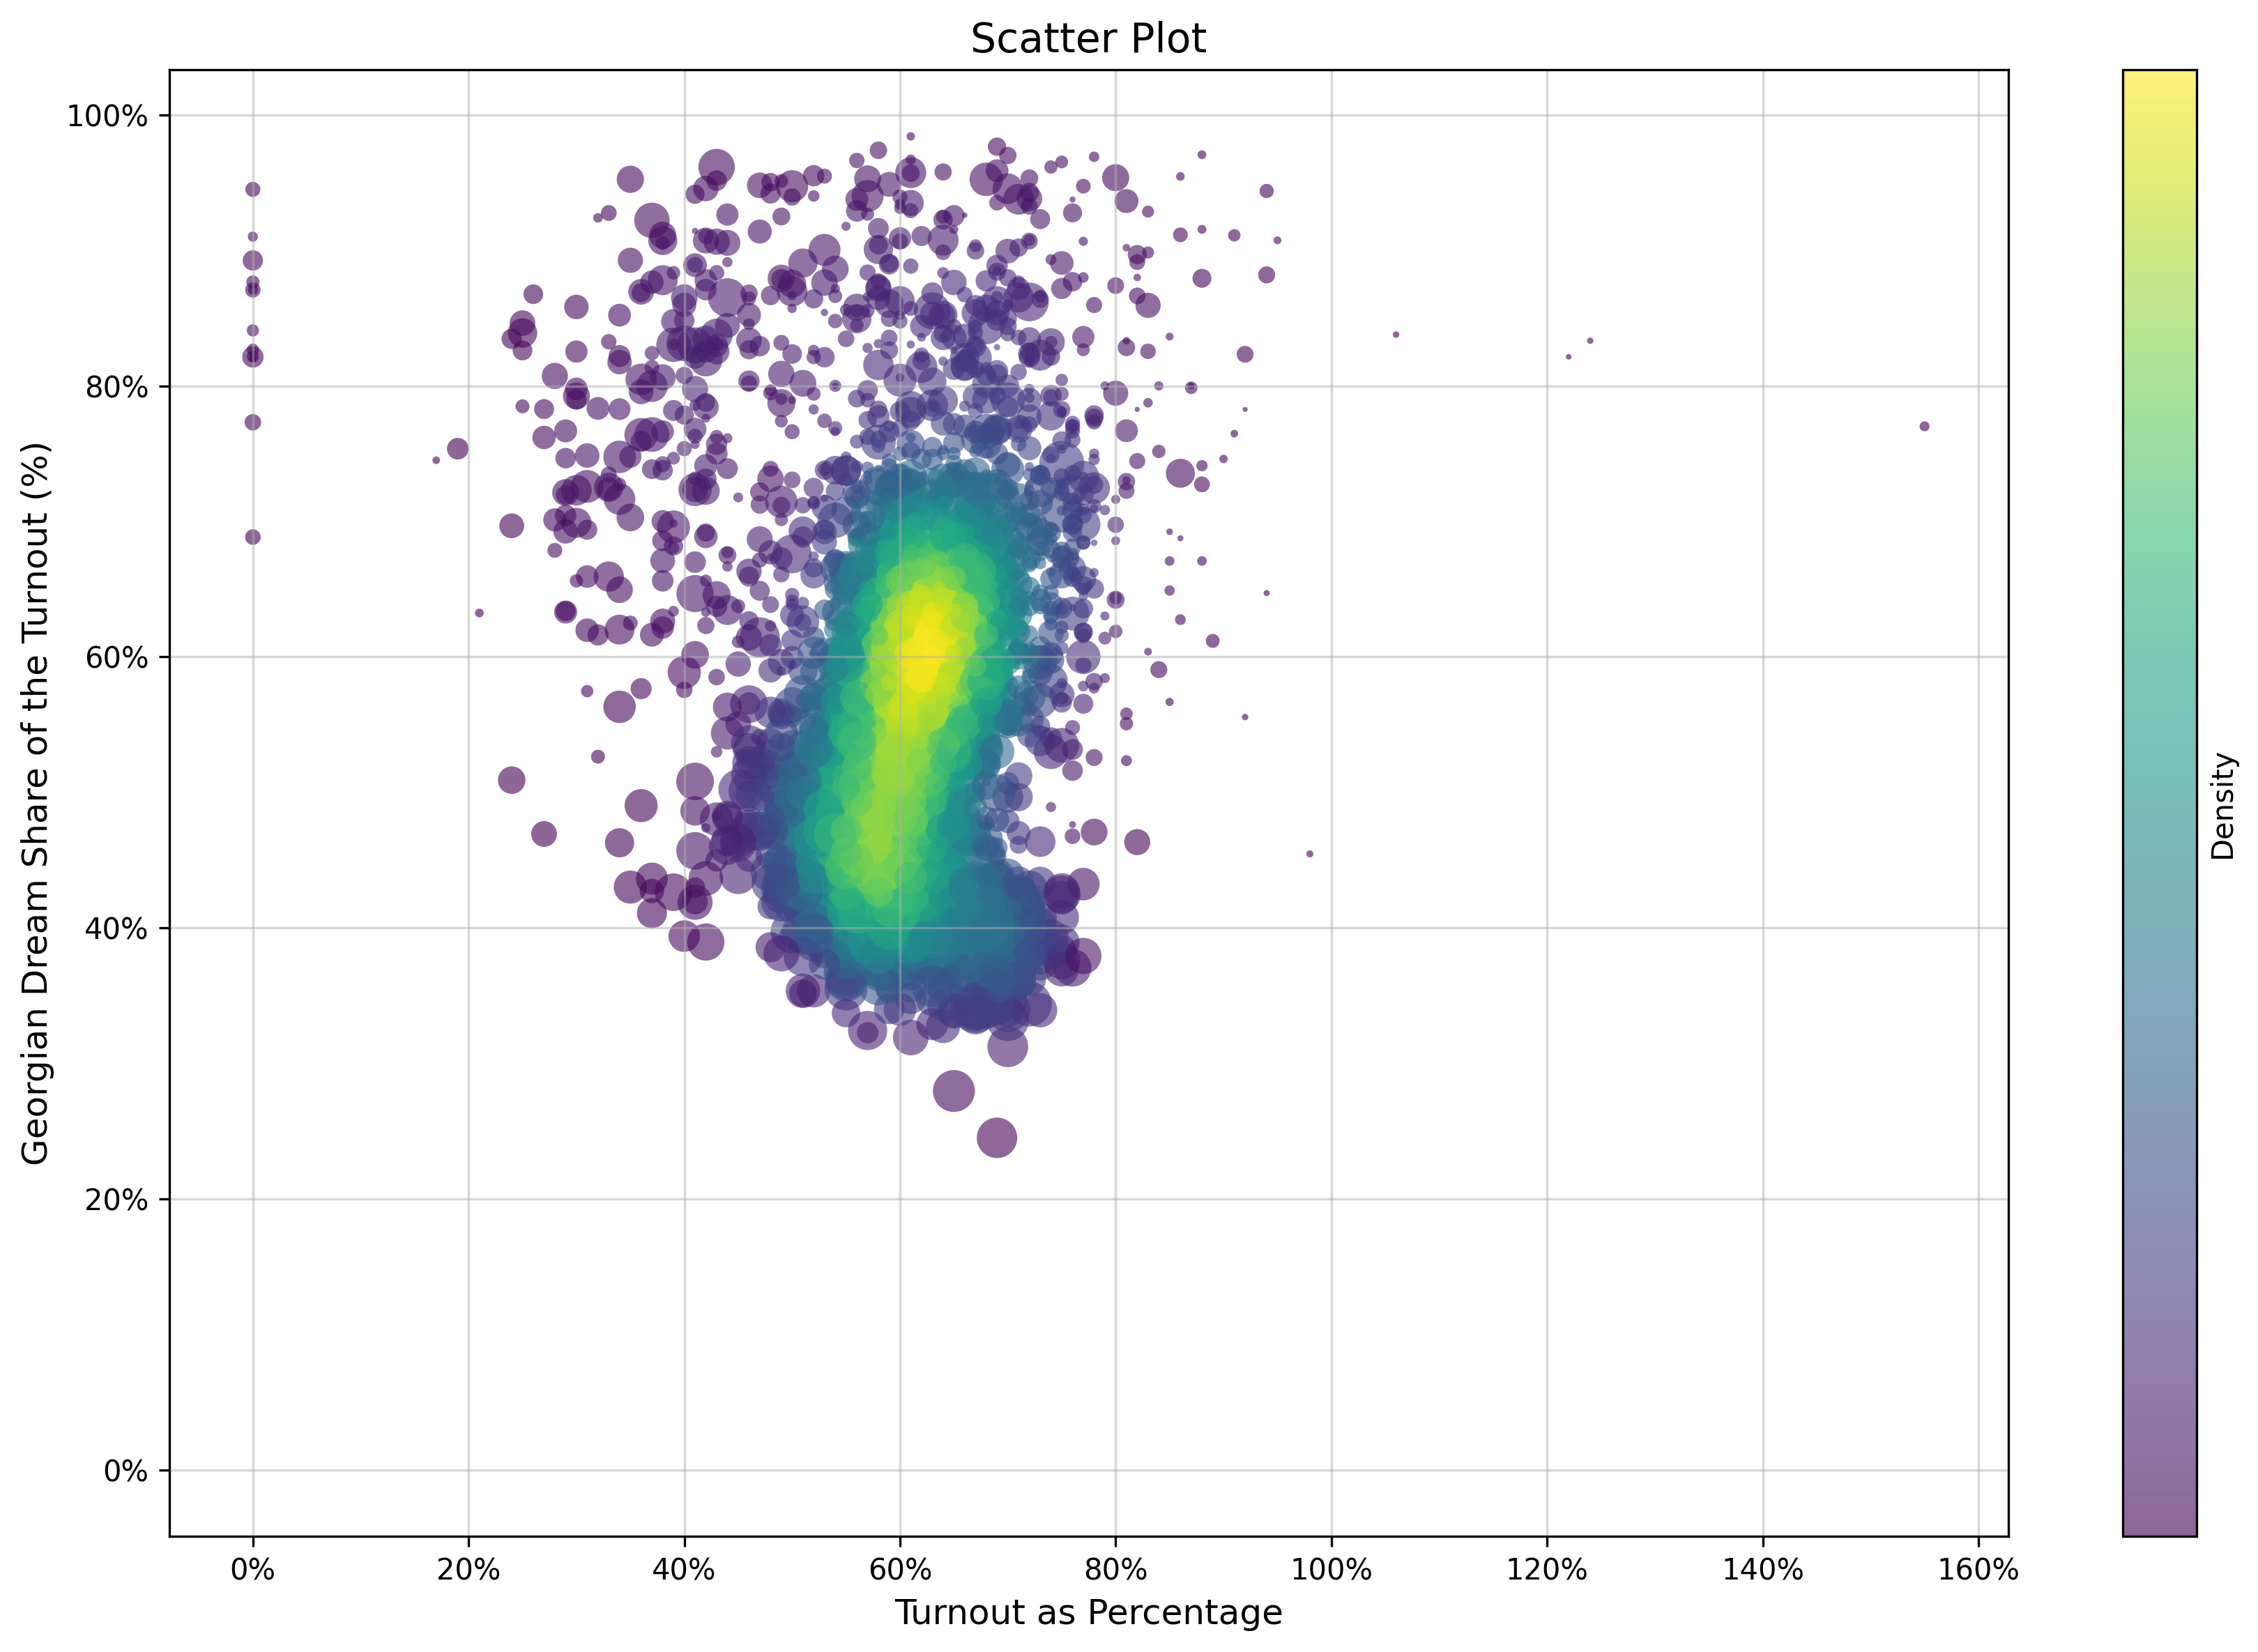

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.ticker import PercentFormatter
import pandas as pd
from math import cos,sin,pi
import matplotlib as mpl
import seaborn as sns


Data= pd.read_csv('Statistics of CESKO.csv')


#Data is DataFrame with the relevant data
x = Data['Perc Turnout']
y = Data['GD Share of the turnout']
sizes = Data['Turnout']  #Sizes based on turnout


# Calculating the density of points
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)


# Normalizing the sizes with "Min-max scaling"
sizes_normalized = (sizes-np.min(sizes))/(np.max(sizes)-np.min(sizes))*300 # 300 is arbitrary

# Creating the scatter plot
plt.figure(figsize=(12, 8), dpi=300)
scatter = plt.scatter(
    x, y, c=density, s=sizes_normalized, cmap='viridis', edgecolor='none', alpha=0.6
)

# Add a colorbar for density
colorbar = plt.colorbar(scatter, label='Point Density')
colorbar.set_label('Density')
colorbar.set_ticks([])

# Formating axes to show percentages
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1))  # x-axis: Turnout as %
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # y-axis: GD Share as %

# Setting plot title and labels
plt.title('Scatter Plot', fontsize=14)
plt.xlabel('Turnout as Percentage', fontsize=12)
plt.ylabel('Georgian Dream Share of the Turnout (%)', fontsize=12)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()